In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
from typing import Tuple
from pprint import pprint
import json

**Part 0: Preparation**<br>
Building a validity checker<br>
Building a determining function<br>

<h3>012</h3>
<h3>345</h3>
<h3>678</h3>

In [ ]:
def check_validity(state: str) -> bool: 
    """checks if a state is valid"""

    x_number = state.count('x')
    o_number = state.count('o')
    empty_number = state.count('_')
    #There should be at most 1 more x then o
    if (x_number < o_number) or (x_number - 1 > o_number):
        return False
    
    if (x_number + o_number + empty_number) != 9:
        return False

    #There can at most be one win
    x_win = False
    o_win = False

    #check diagonals
    if ((state[0] + state[4] + state[8]) == "ooo") or ((state[6] + state[4] + state[2]) == "ooo"):
        o_win = True
    elif ((state[0] + state[4] + state[8]) == "xxx") or ((state[6] + state[4] + state[2]) == "xxx"):
        x_win = True  


    #Check rows and cols
    for i in range(3):
        if (state[3 * i] + state[3 * i + 1] + state[3 * i + 2] == "xxx") or ((state[i] + state[3 + i] + state[6 + i] == "xxx")):
            x_win = True
        if (state[3 * i] + state[3 * i + 1] + state[3 * i + 2] == "ooo") or ((state[i] + state[3 + i] + state[6 + i] == "ooo")):
            o_win = True

    #if two players won, that's impossible
    if x_win and o_win:
        return False
    if x_win and (x_number == o_number):
        return False
    if o_win and (x_number > o_number):
        return False
    
    return True

def check_result(state: str) -> int:
    #check diagonals
    if ((state[0] + state[4] + state[8]) == "ooo") or ((state[6] + state[4] + state[2]) == "ooo"):
        return -1
    elif ((state[0] + state[4] + state[8]) == "xxx") or ((state[6] + state[4] + state[2]) == "xxx"):
        return 1
    #Check rows and cols
    for i in range(3):
        if (state[3 * i] + state[3 * i + 1] + state[3 * i + 2] == "xxx") or ((state[i] + state[3 + i] + state[6 + i] == "xxx")):
            return 1
        if (state[3 * i] + state[3 * i + 1] + state[3 * i + 2] == "ooo") or ((state[i] + state[3 + i] + state[6 + i] == "ooo")):
            return -1
    
    if state.count('_') > 0:
        return 2

    return 0

def display_state(state: str):
    """displays the state"""
    print(state[0] + state[1] + state[2])
    print(state[3] + state[4] + state[5])
    print(state[6] + state[7] + state[8])

**Step 1 & 2: Generate all possible states & Fill in the Q-Table for the perfect opponent**<br>
Find all possible permutations of the final state<br>
For each permutation, remove a char and add to the Q-Table<br>
Fill in the Q-Table as I go<br>

In [11]:
def make_list(x):
    return np.zeros(9)

def drop_char(state: str, move_number: int) -> list:
    """Takes in a state and return all the possible states that could have lead to it"""
    possible_states = list()

    #find out who's marker to remove
    player_marker = 'x' 
    if move_number % 2 == 0:
        player_marker = 'o'

    #go through each char and see if it needs to be removed
    list_state = list(state)
    for i, char in enumerate(list_state):
        if char == player_marker:
            list_state[i] = '_'
            possible_states.append(''.join(list_state))
            list_state[i] = player_marker

    return possible_states

def generate_Q_Table_perfect_opponent() -> pd.DataFrame:
    """Generates a Q-Table against a perfect opponent
    Starts by finding all the end states and removes chars to create lower states
    Uses a pandas data frame for optimal speed"""

    Q_table = pd.DataFrame(columns=['state', 'action', 'move number'])
    
    #Generate the final states
    chars = ['x'] * 5 + ['o'] * 4
    perms = pd.Series(list({''.join(p) for p in itertools.permutations(chars)}))
    perms = perms[perms.apply(check_validity) == True]

    #Append the final states to the Q_Table
    perms = perms.reset_index(drop=True) # pyright: ignore[reportAttributeAccessIssue]
    perms = pd.DataFrame({'state': perms, 'action': 0,'move number': 9})
    Q_table = pd.concat([Q_table, perms], ignore_index=True)
    Q_table['action'] = Q_table['state'].map(make_list)
    
    #Now it is necessary to go through every single final state and drop a char
    #for move_number in range(8, -1, -1):
        #for state in Q_table[Q_table['move number'] == move_number + 1]['state']:
             



    #Then all the necessary possitions to the Q-Table
    return Q_table

generate_Q_Table_perfect_opponent()

,state,action,move number
0,xoxoxxoox,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9
1,oxxoxoxxo,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9
2,ooxoxxxxo,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9
3,xoxooxoxx,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9
4,xoooxxxxo,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9
...,...,...,...
73,oxoooxxxx,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9
74,xxxooxxoo,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9
75,xoooxxoxx,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9
76,oxxxxoxoo,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9



each position where it's the turn of x:
x should be uplifted.
Like for example

_________ should have an increase in the value 2 etc. All the positions and the values which they resulted in, then we cook. Cause then all those positions are prioritised.

Step 1:
Import Data Set

Step 2:
Create a dead empty Q-Table

Step 3:
Create a function which prioritises better positions.

Step 4:
Write the function which can play the game once, store all the positions and moves which lead to them.

In [ ]:
#Step 1 & 2:

def create_empty_Q_Table(filename="results/list_of_all_possible_states.csv"):
    """Creates an empty Q_Table as a dictionary with numpy arrays of zeros"""
    
    Q_Table_read = pd.read_csv("results/list_of_all_possible_states.csv") #read the data set using pandas



    #Create an empty Q_Table
    Q_Table = dict()

    for state in Q_Table_read['state']:
        Q_Table[state] = np.zeros(9)

    return Q_Table


In [12]:
#Import Perfect Q_Table
def change_to_numpy(actions):
    """Changes a normal list to a numpy array"""
    actions = np.array(actions, dtype=float)
    return np.array(actions)

def import_perfect_Q_Table(filename="results/perfect_Q_Table.json"):
    """"Imports the perfect Q_Table that was generated using a different scirpt"""

    with open("results/perfect_Q_Table.json", "r", encoding="utf-8") as f:
        perfect_Q_Table = json.load(f)


    perfect_Q_Table = {state: change_to_numpy(action) for state, action in perfect_Q_Table.items()}

    return perfect_Q_Table

In [ ]:
#Helper Functions
def return_valid_moves(state: str):
    """returns an array where 
    1 => possible to make a move
    0 => square is taken"""
    possible_moves = np.zeros(9)
    for i, move in enumerate(state):
        if move == '_':
            possible_moves[i] = 1
    
    return possible_moves

def pick_learning_move(Q_Table: dict, state:str, tau=np.e, player='x') -> int:
    """picks a random move from a list of possible moves
    uses the softmax function as weights
    """
    
    valid_moves = return_valid_moves(state)

    player_multiplier = 1 #x aims maximise the score
    if player == 'o':
        player_multiplier = -1 #o aims to minimise the score

    weights = np.power(tau, player_multiplier * Q_Table[state]) * valid_moves #generates weights using softmax(values)
    pick = np.random.choice(range(9), p=weights/weights.sum()) #picks random move using weights

    return pick

def pick_random_move(state: str) -> int:
    """This functions picks any random move in the game"""

    weights = return_valid_moves(state) #string x___o__x_ would give weights [0, 1, 1, 1, 0, 1, 1, 0, 1]
    pick = np.random.choice(range(9), p=weights/weights.sum()) 
    return pick


def pick_perfect_move(perfect_Q_Table: dict, state: str, player='x'):
    """This picks a random best possible move"""
    desired_move = np.nanmax(perfect_Q_Table[state]) #x aims to pick the move with the highest Q-value from all avaliable moves

    if player == 'o': #o aims to pick the move with the lowest Q-value from all avaliable moves
        desired_move = np.nanmin(perfect_Q_Table[state])

    possible_indices = []

    for i, move in enumerate(perfect_Q_Table[state]):
        if move == desired_move:
            possible_indices.append(i)

    return random.choice(possible_indices)


def update_board(state:str, action, player='x') -> str:
    """returns a string which is the updated board"""
    state_list = list(state)
    state_list[action] = player
    state = ''.join(state_list)
    return state

def pick_maximum(Q_Table: dict, state: str):
    """finds the what is the best possible result you can achieve"""
    maximum = -1
    valid_moves = return_valid_moves(state)

    for i in range(9):
        if valid_moves[i] == 1:

            if Q_Table[state][i] > maximum:
                maximum = max(maximum, Q_Table[state][i])

    
    return maximum

def pick_minimum(Q_table: dict, state: str):
    """finds the what is the worst possible result you can achieve"""
    minimum = 1
    valid_moves = return_valid_moves(state)

    for i in range(9):
        if valid_moves[i] == 1:

            if Q_Table[state][i] > minimum:
                minimum = min(minimum, Q_Table[state][i])

    
    return minimum

def learn_from_qeue(Q_Table, qeue, alpha=0.1, player='x'):
    """Updates the Q_Table based on the past games"""


    for game, result in qeue: #goes through ever game in the qeue

        for move_number, (state, action) in enumerate(game): #go through each state and action taken in the game

            if (move_number + 1) == len(game):
                if player == 'o':
                    result = -result

                Q_Table[state][action] += alpha * (result - Q_Table[state][action]) #If the game is terminated, the give immidiate reward as a resut

            else: 

                next_state = game[move_number + 1][0] #next state
                if player == 'x':
                    Q_Table[state][action] += alpha * (pick_maximum(Q_Table, next_state) - Q_Table[state][action]) # x aims to have most positive winning chances
                if player == 'o':
                    Q_Table[state][action] += alpha * (pick_maximum(Q_Table, next_state) - Q_Table[state][action]) # o aims to have most negative entries

def display_counter(counter):
    total = sum(counter) / 100
    print(f"{counter[0]/total:.2f}%   {counter[1]/total:.2f}%   {counter[2]/total:.2f}%")

def calculate_tau(turn) -> float:
    """returns tau
    Higher tau means the moves deemed good are more likely to be chosen"""
    
    tau = 1 + 2 * turn/100
    
    return float(tau)

def calculate_alpha(turn) -> float:
    """returns tau
    Higher tau means the moves deemed good are more likely to be chosen"""
    
    alpha = 0.1#max(0.0001, 0.1 * np.exp(-0.0001 * turn))
    return float(alpha)



In [15]:
#Functions related to playing the game

def play_the_game_learning(Q_Table, tau=np.e, player='x', perfect_opponent=False, perfect_Q_Table=dict()):
    """Playes the game and returns a qeue of tuples"""
    queue = []
    state = "_________"
    move_number = 0
    result = 2
    player_index = 0
    oppostion = 'o'


    if player == 'o':
        player_index = 1
        oppostion = 'x'

    while result == 2: #While the game is still going
        if (move_number % 2) == player_index: #If it's the turn of the learning player
            action = pick_learning_move(Q_Table, state, tau, player) #Play a learned move
            queue.append((state, action)) #Record the move
            state = update_board(state, int(action), player) #Update board

        else:
            if perfect_opponent:
                action = pick_perfect_move(perfect_Q_Table, state, oppostion)
            else:
                action = pick_random_move(state) #Or, just play a random move
            state = update_board(state, action, oppostion) #Update board

        move_number += 1

        result = check_result(state)
    return queue, result

def play_the_game_random(Q_Table, player='x'):
    """Playes the randomly from both sides game and returns a qeue of tuples"""
    state = "_________"
    move_number = 0
    result = 2
    player_index = 0
    oppostion = 'o'


    if player == 'o':
        player_index = 1
        oppostion = 'x'

    while result == 2: #While the game is still going
        if (move_number % 2) == player_index: #If it's the turn of the learning player
            action = pick_random_move(state) #Or, just play a random move
            state = update_board(state, action, player) #Update board

        else:
            action = pick_random_move(state) #Or, just play a random move
            state = update_board(state, action, oppostion) #Update board

        move_number += 1

        result = check_result(state)
    return result


In [16]:
counter_final_values = [] #list of how well the bot is performing

In [17]:
counter = [0, 0, 0]

player='o'

BATCH_SIZE = 10
NUMBER_OF_BATCHES = 10000


    

for batch_number in range(1, NUMBER_OF_BATCHES): #this many batches
    game_qeue = []

    tau = calculate_tau(batch_number * BATCH_SIZE)
    for game_number in range(BATCH_SIZE): #each batch is 10 games long
        
        qeue, result = play_the_game_learning(Q_Table,tau,  player, True, perfect_Q_Table) #plays the games
        counter[result + 1] += 1 #updates the result
        game_qeue.append((qeue, result))

    alpha = calculate_alpha(batch_number * BATCH_SIZE)
    learn_from_qeue(Q_Table, game_qeue, alpha, player) #updates the q_table


    if batch_number % 100 == 0: #every hundred values, displays score
        counter_final_values.append(counter)
        print(int(batch_number/100))
        display_counter(counter)
        counter = [0, 0, 0]

    





1
0.00%   3.70%   96.30%
2
0.00%   4.20%   95.80%
3
0.00%   3.60%   96.40%
4
0.00%   3.80%   96.20%
5
0.00%   4.80%   95.20%
6
0.00%   5.80%   94.20%
7
0.00%   8.10%   91.90%
8
0.00%   10.20%   89.80%
9
0.00%   12.30%   87.70%
10
0.00%   10.90%   89.10%
11
0.00%   14.50%   85.50%
12
0.00%   18.40%   81.60%
13
0.00%   21.80%   78.20%
14
0.00%   24.80%   75.20%
15
0.00%   28.90%   71.10%
16
0.00%   30.40%   69.60%
17
0.00%   32.60%   67.40%
18
0.00%   39.30%   60.70%
19
0.00%   39.90%   60.10%
20
0.00%   39.00%   61.00%
21
0.00%   47.40%   52.60%
22
0.00%   51.10%   48.90%
23
0.00%   51.90%   48.10%
24
0.00%   52.20%   47.80%
25
0.00%   55.00%   45.00%
26
0.00%   56.00%   44.00%
27
0.00%   59.60%   40.40%
28
0.00%   58.30%   41.70%
29
0.00%   63.90%   36.10%
30
0.00%   63.20%   36.80%
31
0.00%   65.30%   34.70%
32
0.00%   68.30%   31.70%
33
0.00%   68.40%   31.60%
34
0.00%   68.90%   31.10%
35
0.00%   71.30%   28.70%
36
0.00%   75.00%   25.00%
37
0.00%   73.40%   26.60%
38
0.00%   75.00%

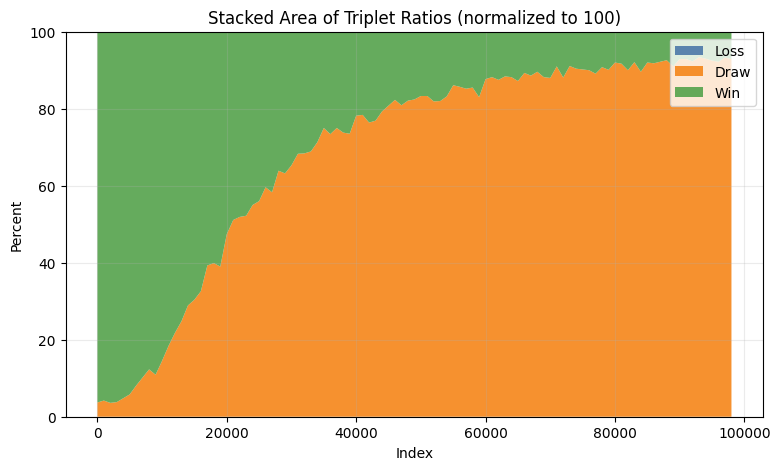

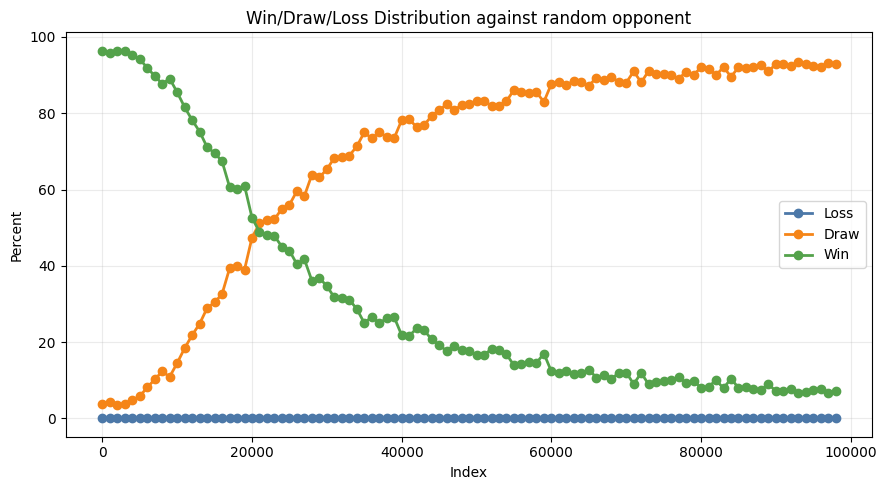

In [18]:

def plot_triplet_ratios(data, component_labels=("A", "B", "C"), normalize=True, show=True):
    """
    Plot a list of 3-element lists (triplets) that (roughly) sum to 100.
    Produces two plots:
      1) Stacked area chart (normalized to 100 if requested)
      2) Line chart of each component over index

    Parameters
    ----------
    data : list[list[float]]
        Sequence of triplets, e.g. [[20, 40, 40], [10, 40, 50], [8, 38, 54], ...]
    component_labels : tuple[str, str, str]
        Names for the three components.
    normalize : bool
        If True, each triplet is scaled so its sum is exactly 100.
        If False, values are plotted as-is.
    show : bool
        If True, calls plt.show() at the end.
    """
    # Validate input
    arr = np.array(data, dtype=float)
    if arr.ndim != 2 or arr.shape[1] != 3:
        raise ValueError("`data` must be a 2D array-like with shape (n_samples, 3).")

    # Optionally normalize each row to sum to 100
    if normalize:
        row_sums = arr.sum(axis=1)
        # Avoid division by zero; keep rows with sum==0 as zeros
        with np.errstate(divide='ignore', invalid='ignore'):
            scale = np.where(row_sums == 0, 0, 100.0 / row_sums)
        arr = (arr.T * scale).T

    # Split components
    comp1, comp2, comp3 = arr.T
    x = np.arange(len(arr))* BATCH_SIZE * 100  # index (could be time or sample order)

    # --- Plot 1: Stacked area (stackplot) ---
    fig1, ax1 = plt.subplots(figsize=(9, 5))
    colors = ["#4C78A8", "#F58518", "#54A24B"]  # pleasant color palette
    ax1.stackplot(x, comp1, comp2, comp3, labels=component_labels, colors=colors, alpha=0.9)
    ax1.set_title("Stacked Area of Triplet Ratios" + (" (normalized to 100)" if normalize else ""))
    ax1.set_xlabel("Index")
    ax1.set_ylabel("Percent")
    ax1.set_ylim(0, max(100, arr.sum(axis=1).max()))  # ensure room if not normalized
    ax1.legend(loc="upper right")
    ax1.grid(True, alpha=0.25)

    # --- Plot 2: Line chart for each component ---
    fig2, ax2 = plt.subplots(figsize=(9, 5))
    ax2.plot(x, comp1, label=component_labels[0], color=colors[0], marker="o", linewidth=2)
    ax2.plot(x, comp2, label=component_labels[1], color=colors[1], marker="o", linewidth=2)
    ax2.plot(x, comp3, label=component_labels[2], color=colors[2], marker="o", linewidth=2)
    ax2.set_title("Win/Draw/Loss Distribution against random opponent" if normalize else "")
    ax2.set_xlabel("Index")
    ax2.set_ylabel("Percent")
    ax2.legend(loc="best")
    ax2.grid(True, alpha=0.25)

    plt.tight_layout()
    if show:
        plt.show()
plot_triplet_ratios(counter_final_values, component_labels=("Loss", "Draw", "Win"), normalize=True)

In [19]:
queue = play_the_game_learning(Q_Table, 2, 'x')
for state, action in queue [0]:
    display_state(state)
    print('\n')
print(queue[1])

___
___
___


___
o__
_x_


_x_
oo_
_x_


-1
